## Optimizing Distribution Facility locations


### Import Packages

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import copy

### Inputs - Instance 1

In [254]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

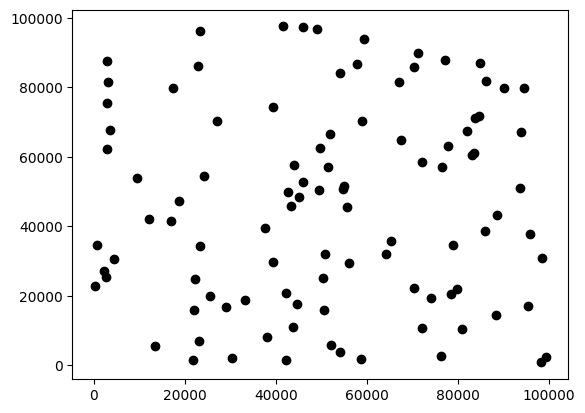

In [255]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Inputs - Instance 2

In [224]:
#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

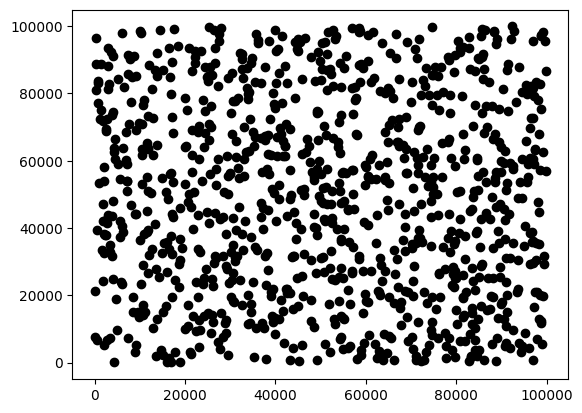

In [225]:
plt.plot(coordlct_x, coordlct_y, 'o', color='black');

### Outputs

#### Initial Solution

In [263]:
#Setting up initial solution
random.seed(1)
###This is incorrectly introducing k new facilities
#fac_coordlct_x = random.choices(range(0, rangelct), k=openfac)
#fac_coordlct_y = random.choices(range(0, rangelct), k=openfac)

#choosing k facilities from the already generated
indices = random.sample(range(n), openfac)
indices.sort(reverse=True)
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
removed_indices = list(range(n))


fac_coordlct_x, fac_coordlct_y = [], []
for index in indices:
    fac_coordlct_x.append(removedX.pop(index))
    fac_coordlct_y.append(removedY.pop(index))
    removed_indices.pop(index)
    

print(indices)
print(removed_indices)




[97, 83, 72, 63, 62, 60, 57, 48, 32, 26, 17, 15, 12, 8, 3]
[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99]


1245436.2694450724
{32: [0, 24, 31, 50], 17: [1, 18, 22, 80, 82], 15: [2, 37], 97: [4, 5, 21, 29, 33, 55, 61, 65, 75, 76, 84, 86, 89], 62: [6, 7, 38, 54, 58, 66, 74, 78, 92, 95, 98], 8: [9, 42, 77], 48: [10, 36, 41, 46, 53, 67, 90, 93, 94], 57: [11, 39, 64, 99], 72: [13, 20, 35, 91], 3: [14, 23, 25, 27, 28, 30, 34, 43, 47, 69], 60: [16, 88], 26: [19, 56, 71], 12: [40, 44, 51, 52, 68, 79, 81, 85, 96], 63: [45, 49, 73], 83: [59, 70, 87]}


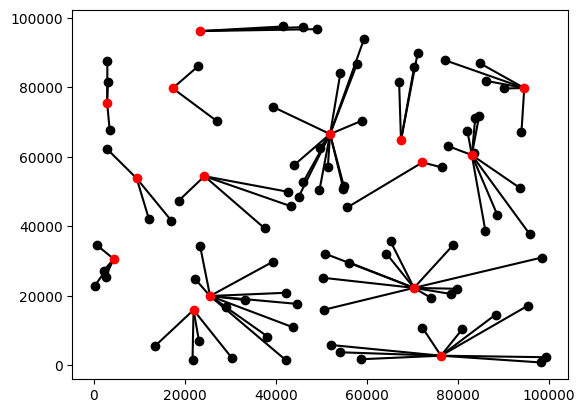

In [264]:
def connectpoints(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],'k-')

#for i_index in range(len(linkindex_p2)): 
   # connectpoints(coordlct_x,coordlct_y,fac_coordlct_x[i_index],fac_coordlct_y[i_index])

def distance (x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

def plot_min_dist(x, y, kx, ky):
    obj = 0
    for idx in range(n - openfac):
        min = 0
        chosenK = 0
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min or min == 0:
                min = currentDist
                chosenK = idx_k
        connectpoints(x[idx], y[idx], kx[chosenK], ky[chosenK])
        obj += min
    return obj

def plot_min_dist2(soln_dictionary):
    for facil in list(soln_dictionary.keys()):
        for neighbour in soln_dictionary[facil]:
            connectpoints(coordlct_x[neighbour], coordlct_y[neighbour], coordlct_x[facil], coordlct_y[facil])

def calc_min_dist(x, y, kx, ky, tindices):
    obj = 0
    soln = {}
    
    # Step 1: Populate soln with actual neighbors
    for idx in range(n - openfac):
        min_dist = float('inf')
        chosenK = None
        for idx_k in range(openfac):
            currentDist = distance(x[idx], y[idx], kx[idx_k], ky[idx_k])
            if currentDist < min_dist:
                min_dist = currentDist
                chosenK = idx_k
        # Update Solution Dictionary with closest facility
        if soln.get(tindices[chosenK]) is None:
            soln[tindices[chosenK]] = [removed_indices[idx]]
        else:
            soln[tindices[chosenK]].append(removed_indices[idx])
        obj += min_dist
    
    # Step 2: Ensure all facilities are in the solution dictionary with empty lists if no neighbors
    for facil in tindices:
        if facil not in list(soln.keys()):
            soln[facil] = []
            #print("Facility with no neighbors added:", facil)
    
    return obj, soln



ObjValue, Solution = calc_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y, indices)
plot_min_dist2(Solution)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');
print(ObjValue)
print(Solution)
# for x, y, name in zip(fac_coordlct_x, fac_coordlct_y, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')


#### Random Sample

In [258]:
random.seed(3)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 




while cputime_i[-1]<30:
    
    iteration=iteration+1
    
    #Random permutation
    indices = random.sample(range(n), openfac)
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))
    

    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)
    
    #Compute Objective Value
    ObjValue, Solution = calc_min_dist(removedX, removedY, fac_coordlct_x, fac_coordlct_y, indices)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(indices)
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        OptSolution = copy.deepcopy(Solution)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
    
    #Code for Updating Plot
    # plt.plot(removedX, removedY, 'o', color='black');
    # plt.plot(fac_coordlct_x, fac_coordlct_y, 'o', color='red');

    # plt.draw()
    # plt.pause(0.1)
    # plt.clf()
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

1245436.2694450724
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1029762.9423728137
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191943112
1010703.2191

904890.7894671629
{18: [1, 17, 53, 80, 82], 11: [4, 5, 33, 37, 64, 66, 69, 89, 98, 99], 41: [6, 7, 38, 74, 90, 94], 39: [8, 9, 30, 42, 57, 77], 48: [10, 22, 36, 46, 67, 93], 44: [12, 51, 58, 62, 92, 95, 96], 72: [13, 20, 35, 91], 28: [14, 23, 25, 47, 50, 54, 68, 78, 81], 2: [15, 63], 60: [16, 19, 26, 56, 71, 83, 88], 86: [21, 45, 49, 59, 70, 73, 75, 87], 0: [24, 31], 3: [27, 32, 34, 43], 40: [52, 79, 85], 29: [55, 61, 65, 76, 84, 97]}


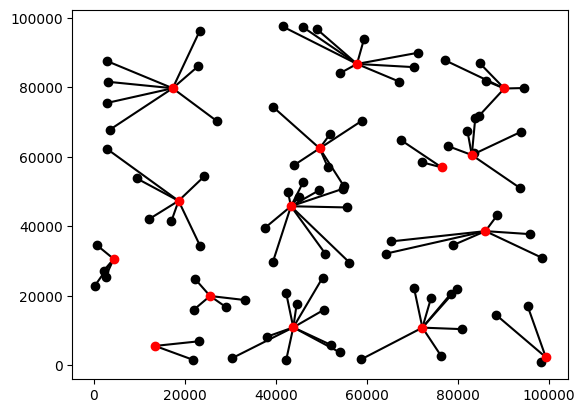

In [259]:

removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)
plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
print(ObjValueOpt)
print(OptSolution)


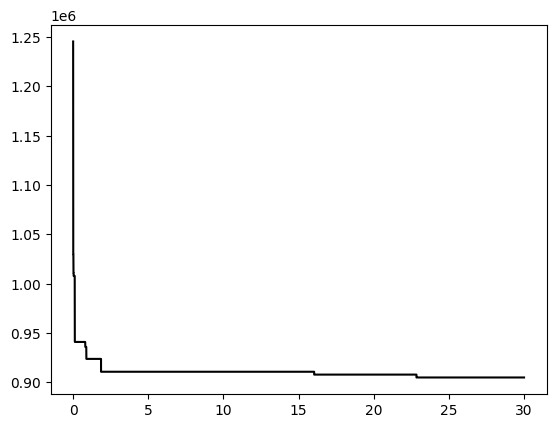

In [260]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

#### Local Search

In [265]:
def swap_with_neighbour(soln_dictionary):
    #print(soln_dictionary)
    one_move = []
    for i in range(openfac):
        #choose one facil to improve
        chosen = sorted(list(soln_dictionary.keys()))[i]
        new_indices = [x for x in indices]
        if soln_dictionary[chosen]:
            chosen_neighbour = random.choice(soln_dictionary[chosen])
            new_indices = [chosen_neighbour if x == chosen else x for x in indices]
            #print(chosen, chosen_neighbour)
        #else:
            #("This has no neighbours: ", chosen)

        new_indices.sort(reverse=True)
        #print("New indices: " , len(new_indices))
        rX, rY = coordlct_x.copy(), coordlct_y.copy()
        r_indices = list(range(n))


        fac_x, fac_y = [], []
        for index in new_indices:
            fac_x.append(rX.pop(index))
            fac_y.append(rY.pop(index))
            r_indices.pop(index)
        TempObjValue, TempSolution = calc_min_dist(rX, rY, fac_x, fac_y, new_indices)
        one_move.append((TempObjValue, TempSolution))
    
    #print(one_move)
    best_move = min(one_move, key=lambda x: x[0])
    while len(best_move[1].keys()) != len(new_indices):
        one_move.remove(best_move)
        best_move = min(one_move, key=lambda x: x[0])
    return best_move
    





    




In [266]:
random.seed(8)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
OptIndices = copy.deepcopy(indices)



while cputime_i[-1]<30:
    
    iteration=iteration+1
    
    #K opt the solution

    
    #Compute Objective Value
    ObjValue, Solution= swap_with_neighbour(Solution)
    
    indices = list(Solution.keys())
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))


    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(sorted(list(Solution.keys())))
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        OptSolution = copy.deepcopy(Solution)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

1164646.7903250435
1080956.7312269479
1041279.1399855599
1000018.085371364
951926.0315449731
914760.7914034347
902675.4673870167
902675.4673870167
868954.5078058657
868954.5078058657
863915.6512548301
863915.6512548301
861887.3205108374
857313.4704435777
854139.9989126008
848576.6564889988
848576.6564889988
848035.1246894804
839607.9337144865
832890.4479861677
830847.2494922898
830765.8947857616
828565.916660388
828565.916660388
825164.3544881773
825164.3544881773
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820

[4, 16, 18, 26, 28, 32, 35, 39, 40, 67, 70, 73, 92, 94, 98]
791736.9605361611
[98, 94, 92, 73, 70, 67, 40, 39, 35, 32, 28, 26, 18, 16, 4]
{34: [0, 3, 23, 24, 27, 31, 32, 44, 48, 51, 70], 82: [1, 17, 18, 54, 81], 67: [2, 10, 15, 22, 36, 49, 64, 93], 4: [5, 11, 33, 37, 62, 65, 66, 85, 90, 99], 98: [6, 38, 69, 79], 92: [7, 12, 45, 53, 59, 63, 95, 96], 39: [8, 30, 43, 58, 78, 89], 26: [9, 16, 19, 57, 61, 72], 35: [13, 20, 73, 91], 68: [14, 25, 28, 52, 55, 83], 86: [21, 46, 50, 74, 76], 97: [29, 56, 77], 90: [42, 47, 75, 94], 87: [60, 71, 84], 40: [80, 88]}


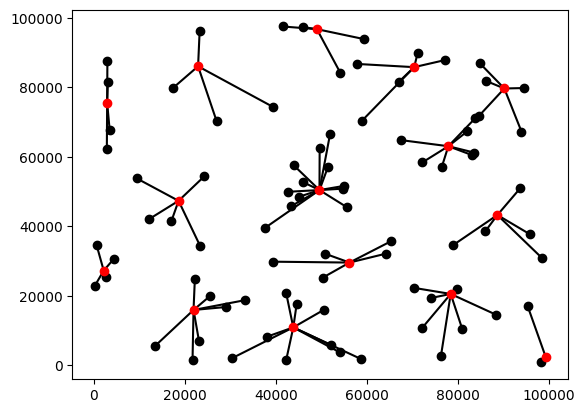

In [267]:
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
print(OptIndices)
OptIndices.sort(reverse=True)
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)

plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
# for x, y, name in zip(OptSolutionX, OptSolutionY, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')
print(ObjValueOpt)
print(OptIndices)
print(Solution)

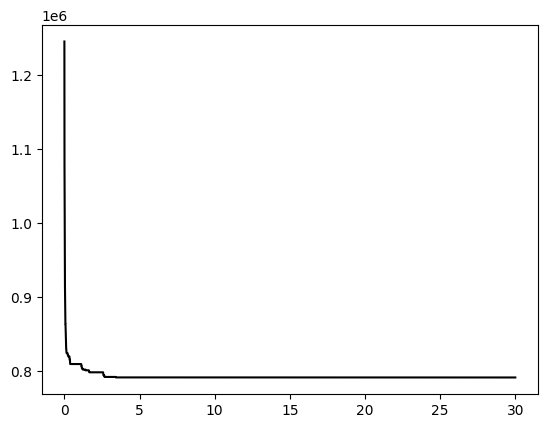

In [268]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')

In [204]:
########     DEFUNCT    #########################
#################################################
#Setting k -opt (WRONG FUNCTION )

k = 1

def k_opt(nXY, kXY):
    #nXY is a tuple of x and y coords lists, kxy is a tuple of facil x and y coords lists
    random.seed(5)
    indicesN = random.sample(range(n - openfac), k)
    indicesK = random.sample(range(openfac), k)
    for i in range(k):
        #swap x
        nXY[0][indicesN[i]], kXY[0][indicesK[i]] = kXY[0][indicesK[i]], nXY[0][indicesN[i]]
        #swap y
        nXY[1][indicesN[i]], kXY[1][indicesK[i]] = kXY[1][indicesK[i]], nXY[1][indicesN[i]]

#### Simulated Annealing

In [ ]:
def swap_with_neighbour(soln_dictionary):
    #print(soln_dictionary)
    one_move = []
    for i in range(openfac):
        #choose one facil to improve
        chosen = sorted(list(soln_dictionary.keys()))[i]
        new_indices = [x for x in indices]
        if soln_dictionary[chosen]:
            chosen_neighbour = random.choice(soln_dictionary[chosen])
            new_indices = [chosen_neighbour if x == chosen else x for x in indices]
            #print(chosen, chosen_neighbour)
        #else:
            #("This has no neighbours: ", chosen)

        new_indices.sort(reverse=True)
        #print("New indices: " , len(new_indices))
        rX, rY = coordlct_x.copy(), coordlct_y.copy()
        r_indices = list(range(n))


        fac_x, fac_y = [], []
        for index in new_indices:
            fac_x.append(rX.pop(index))
            fac_y.append(rY.pop(index))
            r_indices.pop(index)
        TempObjValue, TempSolution = calc_min_dist(rX, rY, fac_x, fac_y, new_indices)
        one_move.append((TempObjValue, TempSolution))
    
    #print(one_move)
    best_move = min(one_move, key=lambda x: x[0])
    while len(best_move[1].keys()) != len(new_indices):
        one_move.remove(best_move)
        best_move = min(one_move, key=lambda x: x[0])
    return best_move


In [ ]:
random.seed(8)
iteration=0
ObjValueOpt=ObjValue
Objvalue_list=ObjValue
program_starts = time.time()
cputime_i=[0,0] 
OptIndices = copy.deepcopy(indices)



while cputime_i[-1]<30:
    
    iteration=iteration+1
    
    #K opt the solution

    
    #Compute Objective Value
    ObjValue, Solution= swap_with_neighbour(Solution)
    
    indices = list(Solution.keys())
    indices.sort(reverse=True)
    removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
    removed_indices = list(range(n))


    fac_coordlct_x, fac_coordlct_y = [], []
    for index in indices:
        fac_coordlct_x.append(removedX.pop(index))
        fac_coordlct_y.append(removedY.pop(index))
        removed_indices.pop(index)
    
    #Update Optimal Solution
    if ObjValue<ObjValueOpt:
        OptIndices = copy.deepcopy(sorted(list(Solution.keys())))
        ObjValueOpt=copy.deepcopy(ObjValue)
        OptSolutionX=copy.deepcopy(fac_coordlct_x)
        OptSolutionY=copy.deepcopy(fac_coordlct_y)
        OptSolution = copy.deepcopy(Solution)
        
    Objvalue_list=np.append(Objvalue_list, ObjValueOpt)
    now = time.time()
    cputime_i=np.append(cputime_i, now-program_starts)
        
    print(ObjValueOpt)
        
#Update last objective value
Objvalue_list=np.append(Objvalue_list, min(Objvalue_list))
now = time.time()
cputime_i=np.append(cputime_i, now-program_starts)

1164646.7903250435
1080956.7312269479
1041279.1399855599
1000018.085371364
951926.0315449731
914760.7914034347
902675.4673870167
902675.4673870167
868954.5078058657
868954.5078058657
863915.6512548301
863915.6512548301
861887.3205108374
857313.4704435777
854139.9989126008
848576.6564889988
848576.6564889988
848035.1246894804
839607.9337144865
832890.4479861677
830847.2494922898
830765.8947857616
828565.916660388
828565.916660388
825164.3544881773
825164.3544881773
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
824534.100552279
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
821895.2815490225
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820024.1466559289
820

[4, 16, 18, 26, 28, 32, 35, 39, 40, 67, 70, 73, 92, 94, 98]
791736.9605361611
[98, 94, 92, 73, 70, 67, 40, 39, 35, 32, 28, 26, 18, 16, 4]
{34: [0, 3, 23, 24, 27, 31, 32, 44, 48, 51, 70], 82: [1, 17, 18, 54, 81], 67: [2, 10, 15, 22, 36, 49, 64, 93], 4: [5, 11, 33, 37, 62, 65, 66, 85, 90, 99], 98: [6, 38, 69, 79], 92: [7, 12, 45, 53, 59, 63, 95, 96], 39: [8, 30, 43, 58, 78, 89], 26: [9, 16, 19, 57, 61, 72], 35: [13, 20, 73, 91], 68: [14, 25, 28, 52, 55, 83], 86: [21, 46, 50, 74, 76], 97: [29, 56, 77], 90: [42, 47, 75, 94], 87: [60, 71, 84], 40: [80, 88]}


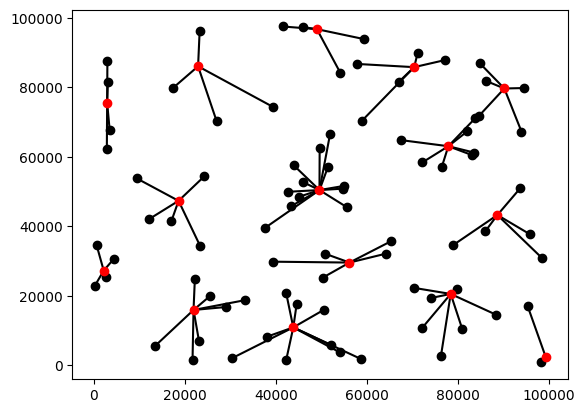

In [ ]:
removedX, removedY = coordlct_x.copy(), coordlct_y.copy()
print(OptIndices)
OptIndices.sort(reverse=True)
for index in OptIndices:
    removedX.pop(index)
    removedY.pop(index)

plot_min_dist(removedX, removedY, OptSolutionX, OptSolutionY)
plt.plot(removedX, removedY, 'o', color='black');
plt.plot(OptSolutionX, OptSolutionY, 'o', color='red');
# for x, y, name in zip(OptSolutionX, OptSolutionY, sorted(list(Solution.keys()))):
#     plt.text(x, y, name, fontsize=12, ha='right')
print(ObjValueOpt)
print(OptIndices)
print(Solution)

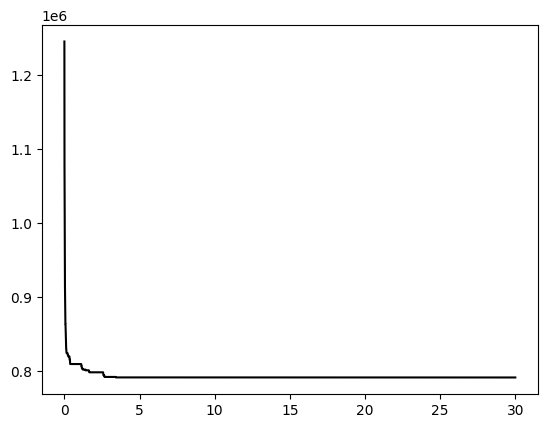

In [ ]:
plt.plot(cputime_i[range(len(Objvalue_list))],Objvalue_list,'k-')